#references and inspirations:

%% html
<li>
<a href="https://medium.freecodecamp.org/what-i-learned-from-analyzing-more-than-80-job-rejections-with-python-11044ee6927b">  Conor Dewey</a>
</li>
<li>
<a href="https://blog.bufferapp.com/8-effective-email-strategies-backed-by-research">  Email marketing Strtgies</a>
</li>





In this project I have tried to study promotional marketing emails, the frequent terms they use, how frequently they reach out to you etc. I have gathered this data from my personal email. I have subscribed to NYC and GAP for their promotional emails
Here's what I have found:

1. None of the mails were addressed with my name 'Dnyanada'
<br>
Personalization is great but mentioning mu name as 'dnyanada p','d',or 'dny' is not going to help.
but personalization with respect to my last purchase, or related to my interests is great
<br>
<br>
2. Subject lines
<br>
we have seen the catchy attention grabbing Subject line terms such as '% off','$', Code, 'Extra' really entice readers to 
open mails and browse.
<br>
<br>

3. Length of Subject lines:<br>
__Gap__: most frequent 40-60 chars long<br>
__NYC__: most frequent 30-40 chars long
<br>
<br>

4. Hours of mails<br>
__Gap__: 7 am<br>
__NYC__: 4 am and 5 pm This was mails received but if sent in EST they were timed ar 7 am and 8 pm
<br>
<br>

5. Days<br>
__Gap__ : prefers Sundays the most<br>
__NYC__ : All days are the Same while Sunday and Thuursday are most preferred
<br>
<br>

6. Having a attention grabbing CTA in Subject line is very important
<br>
<br>
7. Throw in Numbers, discounts, codes, % offs etc
<br>
<br>
8. Most of the mails have interactive GIFs,clickable images, hyperlinks and very minimal textual content
<br>
<br>
9. Using different subject lines and making sure it is not repeatative
<br>
<br>
10. Know your audience if data shows most emails are opened on mobile devices ten ensure your mail/website is optimized
<br>
<br>



In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import email, getpass, imaplib, os, re
from datetime import datetime
%matplotlib inline
sns.set_style('whitegrid')

In [208]:
# Login to gmail
# to make this work please 'allow less secure apps to access mail' option enabled

user = input("Enter your GMail username:")
pwd = getpass.getpass("Enter your password: ")

Enter your GMail username:your email will come here
Enter your password: ········


In [206]:
# Connect to gmail imap sever
m = imaplib.IMAP4_SSL("imap.gmail.com")
m.login(user, pwd)

In [4]:
# Go to correct directory
#m.list()
m.select('"nyc2"')

('OK', [b'1786'])

# For more options on Search Criterion

%% html
<a href="https://www.example-code.com/python/imap_search.asp
"> Click Here</a>
you can search ALL, ANSWERED, FROM or with Data range emails etc

In [5]:
resp, items = m.search(None, "All")
items = items[0].split()

In [8]:
# Initialize lists
text = []
dates = []
subjects = []

In [146]:
# RFC 822 standard even http follow this standard. it consists of header msgs followed by a blank line followed by msg

In [9]:
# Collect data
for emailid in items:
    
    # Fetch everything from the id
    resp, data = m.fetch(emailid, "(RFC822)")
    
    # Get the content
    email_body = data[0][1]
    
    # Convert to mail object
    mail = email.message_from_bytes(email_body)
    
    # Get subject
    subjects.append(email.header.decode_header(mail['Subject'])[0][0])
    
    # Get date
    
    date_tuple = email.utils.parsedate_tz(mail['Date'])
    dates.append(datetime.fromtimestamp(email.utils.mktime_tz(date_tuple)))
    
    # Get text
    if mail.is_multipart():
        text.append(mail.get_payload(0).get_payload())
    else:
        text.append(mail.get_payload())

In [10]:
# Convert to dataframe
nyc = pd.DataFrame(data={'Date': dates, 'Subject': subjects, 'Text': text})
nyc.head()

,Date,Subject,Text
0,2018-12-24 10:20:27,You Still Have Time!,If you are unable to see the images in this em...
1,2018-12-24 04:01:21,80% Off Last Chance Clearance Event,If you are unable to see the images in this em...
2,2018-12-23 17:23:40,Re: Your Holiday Trip...,If you are unable to see the images in this em...
3,2018-12-23 13:31:16,"50% + 20% Off All Eva, Gabrielle & More",If you are unable to see the images in this em...
4,2018-12-23 04:02:38,$2 Cozy Socks In Stores Today Only,If you are unable to see the images in this em...


In [11]:
nyc.dtypes

Date       datetime64[ns]
Subject            object
Text               object
dtype: object

In [12]:
# Break up date column
nyc['Time'] = nyc['Date'].apply(lambda x: x.time())
nyc['Day'] = nyc['Date'].apply(lambda x: x.weekday()).map({0:'Mon', 1:'Tues', 2:'Weds', 
                                                         3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
nyc['Hour'] = nyc['Time'].apply(lambda x: x.hour)
nyc['Date_dt'] =nyc['Date'].apply(lambda x:x.date())
nyc['Date_dt']=pd.to_datetime(nyc['Date_dt'])
nyc.drop(['Date'],axis=1,inplace=True)
nyc = nyc[['Date_dt', 'Time', 'Day', 'Hour', 'Subject', 'Text']]

In [13]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 6 columns):
Date_dt    1786 non-null datetime64[ns]
Time       1786 non-null object
Day        1786 non-null object
Hour       1786 non-null int64
Subject    1786 non-null object
Text       1786 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 83.8+ KB


In [14]:
ny_plt=nyc

In [15]:
ny_plt.drop(['Time','Day','Hour','Text'],axis=1)
ny_plt=ny_plt['Date_dt'].value_counts()
ny_plt.head()

2018-11-25    5
2018-11-26    5
2018-09-06    4
2018-10-02    4
2017-09-03    4
Name: Date_dt, dtype: int64

In [16]:
ny_plt=pd.DataFrame(ny_plt)
type(ny_plt)

pandas.core.frame.DataFrame

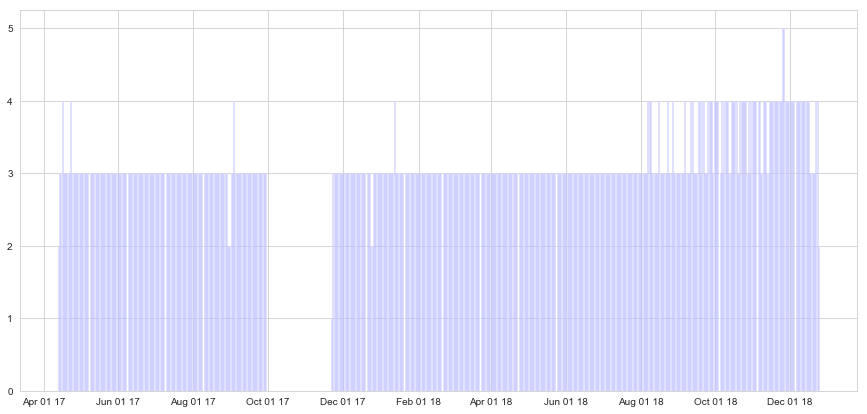

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#ny_plt.set_index('Date_dt',inplace=True)
#plot data
ny_plt['count']=ny_plt['Date_dt']
#ny_plt.drop(['Date_dt'],axis=1)
fig, ax = plt.subplots(figsize=(15,7))
#ny_plt.drop(['Date_dt'],axis=1).plot(ax=ax,color='blue', linewidth=1, alpha=0.4)
ax.bar(ny_plt.index, ny_plt['count'],color='blue', linewidth=1, alpha=0.4)
#set ticks every week
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))

# What Days Most Frequent?

it seems that they send out same number of emails everyday. however Thursday and Sunday is matter the most!

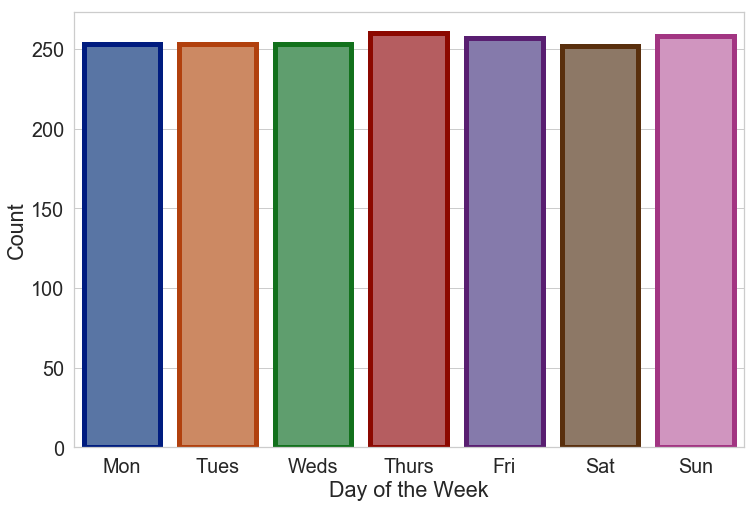

In [19]:
# Visualization

plt.figure(figsize=(12,8))

sns.set(font_scale=1.8)
sns.set_style('whitegrid')
sns.countplot(nyc['Day'], order=['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun'],linewidth=5,edgecolor=sns.color_palette("dark", 7));
plt.xlabel('Day of the Week')
plt.ylabel('Count');


# Popular dates 

In [20]:
nyc['Date_dt'].value_counts().head()

2018-11-25    5
2018-11-26    5
2018-09-06    4
2018-10-02    4
2017-09-03    4
Name: Date_dt, dtype: int64

In [21]:
cyber_sunday=nyc[(nyc['Date_dt']=='2018-11-26')]
cyber_sunday.head(10)

,Date_dt,Time,Day,Hour,Subject,Text
105,2018-11-26,19:56:48,Mon,19,PM Price Drop - $16.20 Puffer Jackets,If you are unable to see the images in this em...
106,2018-11-26,17:45:43,Mon,17,NOW! EXTRA 10% OFF All Our Lowest Prices!,If you are unable to see the images in this em...
107,2018-11-26,13:45:21,Mon,13,BREAKING NOW: $9 Sweaters & $18 Jackets,If you are unable to see the images in this em...
108,2018-11-26,09:34:37,Mon,9,b'\xe2\x9a\xa1',If you are unable to see the images in this em...
109,2018-11-26,04:11:12,Mon,4,CYBER MONDAY w/500 NEW Steals NOW!!!,If you are unable to see the images in this em...


In [22]:
print(cyber_sunday.iloc[0]['Subject'])
print(cyber_sunday.iloc[0]['Text'])

PM Price Drop - $16.20 Puffer Jackets
If you are unable to see the images in this email, click here
http://e.nyandcompany.com/a/tBb-LkQB8uB29B9u7Z1ABmlOYgl/viewonline?t_params=3uj$TIuxsKXI-icnJo9HSQ217abEdXHVEzLcRjzit97LszUbgACGeFa2bYeqMJ4sWhWmlEQ8CV6wAfZ-02r6LaLAsvQddfH3TQFBTr3Ugt66cYpVola$lGhcBjKGoJ9kyWv8DSekaddXP-a4bhqVMXFTd3PW6MqIMRflwJ10W5hIFH299h6XQH1WHTrzavYLr2MydUrISWZb

New York & Company 
http://e.nyandcompany.com/a/tBb-LkQB8uB29B9u7Z1ABmlOYgl/main
-----------------------------------------------------------------

CYBER MONDAY is Almost Over... No Exclusions Extra 10% Off Coupon
& Every Single Cyber Steal ENDING!
http://e.nyandcompany.com/a/tBb-LkQB8uB29B9u7Z1ABmlOYgl/main

-----------------------------------------------------------------

Facebook:
http://e.nyandcompany.com/a/tBb-LkQB8uB29B9u7Z1ABmlOYgl/facebook 

Twitter:
http://e.nyandcompany.com/a/tBb-LkQB8uB29B9u7Z1ABmlOYgl/twitter 

Pinterest
http://e.nyandcompany.com/a/tBb-LkQB8uB29B9u7Z1ABmlOYgl/pinterest 

Instagram


# Visualization


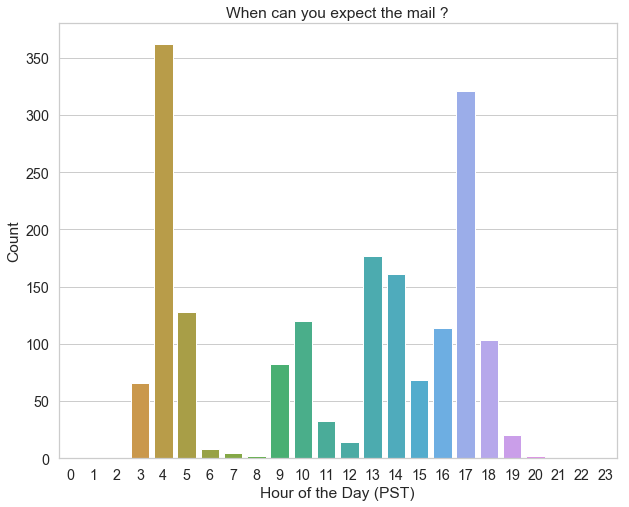

In [23]:
plt.figure(figsize=(10,8))
sns.set(style='whitegrid', palette='muted', font_scale=1.3)
sns.countplot(nyc['Hour'], order=np.arange(0,24));
plt.xlabel('Hour of the Day (PST)')
plt.ylabel('Count');
plt.title('When can you expect the mail ?')
plt.show()

In [24]:
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('English')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize

In [27]:
# Tokenize and remove stop words in Subject
subject_str = nyc['Subject'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,":;()|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

# Get most common words
words = [item[0] for item in Counter(clean).most_common(10)]
counts = [item[1] for item in Counter(clean).most_common(10)]

# Email Subject NYC
you can see that they have used catchy terms like '$', 'Off', '%' discount,'new','+' discount,'free' and 'sale'
to catch attention of readers and potential customers making it look like irrestible offer

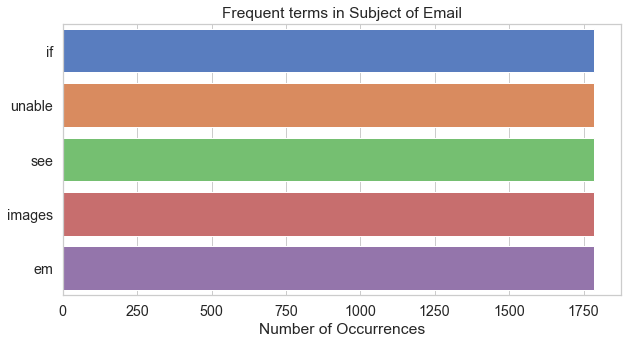

In [47]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');
plt.title('Frequent terms in Subject of Email')
plt.show()

In [198]:
nyc['len_Sub']=nyc['Subject'].apply(lambda x:len(x))
nyc.head()

,Date_dt,Time,Day,Hour,Subject,Text,len_Sub
0,2018-12-24,10:20:27,Mon,10,You Still Have Time!,If you are unable to see the images in this em...,20
1,2018-12-24,04:01:21,Mon,4,80% Off Last Chance Clearance Event,If you are unable to see the images in this em...,35
2,2018-12-23,17:23:40,Sun,17,Re: Your Holiday Trip...,If you are unable to see the images in this em...,24
3,2018-12-23,13:31:16,Sun,13,"50% + 20% Off All Eva, Gabrielle & More",If you are unable to see the images in this em...,39
4,2018-12-23,04:02:38,Sun,4,$2 Cozy Socks In Stores Today Only,If you are unable to see the images in this em...,34


Text(0,0.5,'# of Emails')

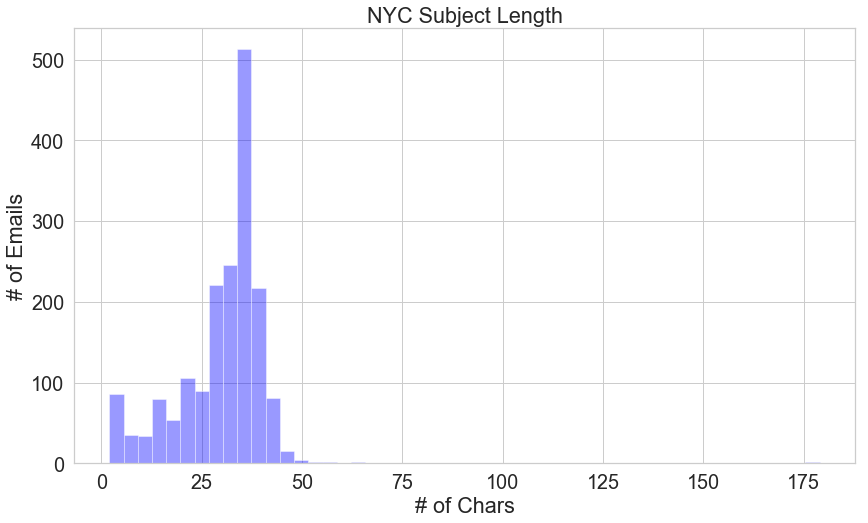

In [203]:
plt.figure(figsize=(14,8))
sns.distplot(nyc['len_Sub'], color = 'blue',kde=False);
# Add labels
plt.title('NYC Subject Length')
plt.xlabel('# of Chars')
plt.ylabel('# of Emails')

In [33]:
# Body

# Tokenize and remove stop words
subject_str = nyc['Text'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,":;()<>//``//]|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

# Get most common words
words = [item[0] for item in Counter(clean).most_common(19)]
counts = [item[1] for item in Counter(clean).most_common(19)]

# Email body NYC
all emails start with same line: If unable to see this email....
this is reflected from out viz below

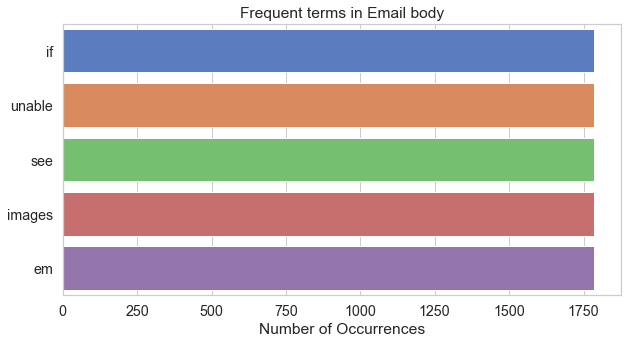

In [65]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');
plt.title('Frequent terms in Email body')
plt.show()

# Gap Factory

In [52]:
user = input("Enter your GMail username:")
pwd = getpass.getpass("Enter your password: ")

Enter your GMail username:arjunwadkardnyanada@gmail.com
Enter your password: ········


In [53]:
m = imaplib.IMAP4_SSL("imap.gmail.com")
m.login(user, pwd)

('OK', [b'arjunwadkardnyanada@gmail.com authenticated (Success)'])

In [54]:
# sleect folder
m.select('"gap"')

('OK', [b'679'])

In [55]:
#If UTF8 is enabled, charset MUST be None.
resp, items = m.search(None, "All")
items = items[0].split()

In [59]:
# Initialize lists
text = []
dates = []
subjects = []

In [60]:
# Collect data
for emailid in items:
    
    # Fetch everything from the id
    resp, data = m.fetch(emailid, "(RFC822)")
    
    # Get the content
    email_body = data[0][1]
    
    # Convert to mail object
    mail = email.message_from_bytes(email_body)
    
    # Get subject
    subjects.append(email.header.decode_header(mail['Subject'])[0][0])
    
    # Get date
    
    date_tuple = email.utils.parsedate_tz(mail['Date'])
    dates.append(datetime.fromtimestamp(email.utils.mktime_tz(date_tuple)))
    
    # Get text
    if mail.is_multipart():
        text.append(mail.get_payload(0).get_payload())
    else:
        text.append(mail.get_payload())

In [61]:
# Convert to dataframe
gap = pd.DataFrame(data={'Date': dates, 'Subject': subjects, 'Text': text})
gap.head()
# \xe2\x80\x94 is a -- in mails

,Date,Subject,Text
0,2018-12-26 07:52:14,"b""IT'S OFFICIAL\xe2\x80\x94up to 75% off markd...",Up to 75% off markdowns + 40% off everything (...
1,2018-12-26 07:15:15,Great Gap Sale (up to 75% off) starts NOW,\r\n\r\nGap Outlet\r\nhttp://click.email.gapf...
2,2018-12-25 17:19:06,It all starts TOMORROW! (Trust: you don't want...,Great Gap Sale starts 12/26.\r\nGAP\r\nhttps:/...
3,2018-12-21 07:57:25,"GIFTS SHIP UNTIL 3PM ET (plus, 51% OFF starts ...",Just in time: 51% OFF your purchase starts now...
4,2018-12-20 17:32:42,SHOP QUICK! HOURS LEFT for FREE shipping on $1...,45% off every single thing.\r\nGAP\r\nhttps://...


In [63]:
# Break up date column

gap['Time']=gap['Date'].apply(lambda x:x.time())
gap['Day']=gap['Date'].apply(lambda x: x.weekday()).map({0:'Mon', 1:'Tues',2:'Wedn',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
gap['Hour']=gap['Date'].apply(lambda x: x.hour)
gap['Date_dt']=gap['Date'].apply(lambda x:x.date())
gap['Date_dt']=pd.to_datetime(gap['Date_dt'])
gap=gap[['Date_dt','Time','Day','Hour','Subject','Text']]

In [66]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 6 columns):
Date_dt    679 non-null datetime64[ns]
Time       679 non-null object
Day        679 non-null object
Hour       679 non-null int64
Subject    679 non-null object
Text       679 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 31.9+ KB


In [67]:
gap_pt=gap
gap_pt.drop(['Time','Day','Hour','Text'],axis=1)
gap_pt=gap_pt['Date_dt'].value_counts()
gap_pt.head()

2018-06-28    5
2018-11-27    4
2018-02-26    4
2017-12-04    4
2017-11-28    4
Name: Date_dt, dtype: int64

In [68]:
gap_pt=pd.DataFrame(gap_pt)

In [87]:
gap_pt['Date_dt']=pd.to_datetime(gap_pt['Date_dt'])
gap_pt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359 entries, 2018-06-28 to 2018-12-21
Data columns (total 2 columns):
Date_dt    359 non-null datetime64[ns]
count      359 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.4 KB


In [92]:
#gp=gap_pt[(gap_pt['Date_dt']> datetime.date(2017,11,1))]
gap_pt.head()

,Date_dt,count
2018-06-28,1970-01-01 00:00:00.000000005,5
2018-11-27,1970-01-01 00:00:00.000000004,4
2018-02-26,1970-01-01 00:00:00.000000004,4
2017-12-04,1970-01-01 00:00:00.000000004,4
2017-11-28,1970-01-01 00:00:00.000000004,4


In [90]:
gap_pt.index

DatetimeIndex(['2018-06-28', '2018-11-27', '2018-02-26', '2017-12-04',
               '2017-11-28', '2018-11-24', '2018-11-25', '2018-06-10',
               '2017-11-27', '2018-11-23',
               ...
               '2018-09-18', '2018-08-17', '2018-03-16', '2018-01-13',
               '2018-03-01', '2018-11-02', '2018-07-01', '2018-12-17',
               '2018-07-20', '2018-12-21'],
              dtype='datetime64[ns]', length=359, freq=None)

In [94]:
gp=gap_pt.loc['2017-11-20':]

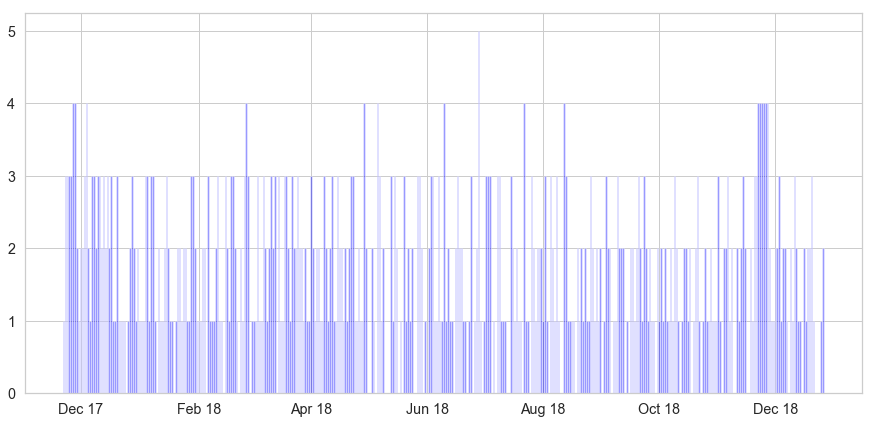

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize=(15,7))
#gp.drop(['Date_dt'],axis=1).plot(ax=ax,color='blue', linewidth=1, alpha=0.4)
ax.bar(gp.index, gp['count'],color='blue', linewidth=1, alpha=0.4)
#set ticks every week
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

# Most frequent days of the week?
Sunday is clearly the most favourite day to reach out to customers


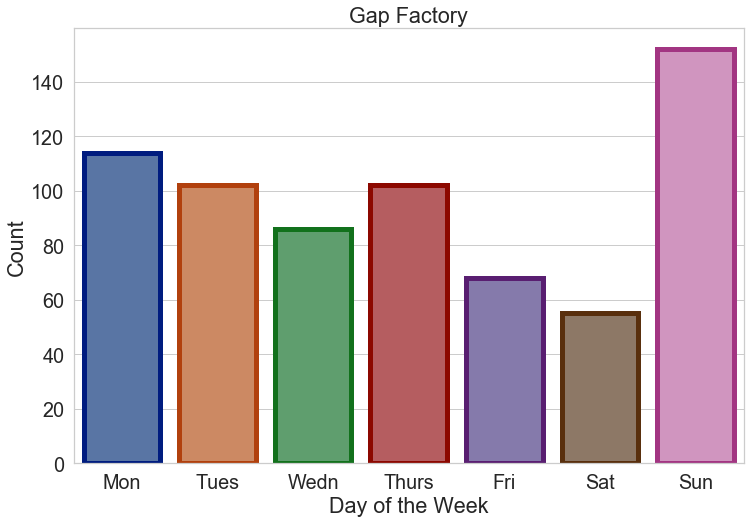

In [144]:
# Visualization

plt.figure(figsize=(12,8))

sns.set(font_scale=1.8)
sns.set_style('whitegrid')
sns.countplot(gap['Day'], order=['Mon', 'Tues', 'Wedn', 'Thurs', 'Fri', 'Sat', 'Sun'],linewidth=5,edgecolor=sns.color_palette("dark", 7));
plt.xlabel('Day of the Week')
plt.ylabel('Count');
plt.title('Gap Factory')
plt.show()

# Sunday Email timing strategy
Sunday early morning emails seems to be a good way to reach out to customers assuming most customers are at malls then
(may be this is the decision to mail on Sunday mornings is something they have come up with based on sales data )

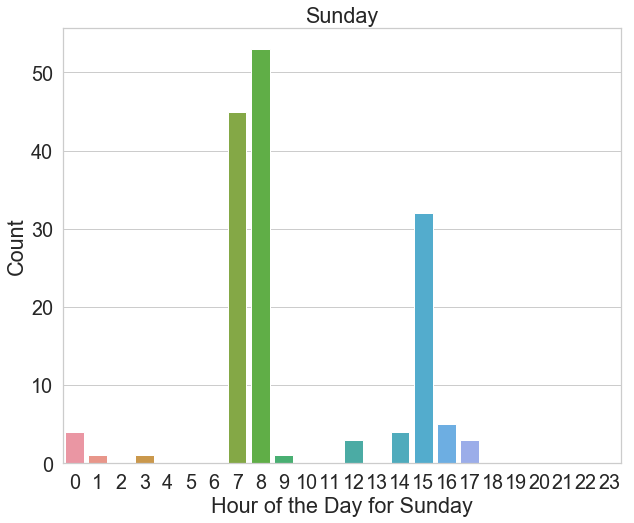

In [108]:
sh=gap[gap['Day']=='Sun']
#sh['Hour'].value_counts().plot(kind='bar')

# Visualization
plt.figure(figsize=(10,8))
sns.countplot(sh['Hour'], order=np.arange(0,24));
plt.xlabel('Hour of the Day for Sunday')
plt.ylabel('Count');
plt.title('Sunday')
plt.show()

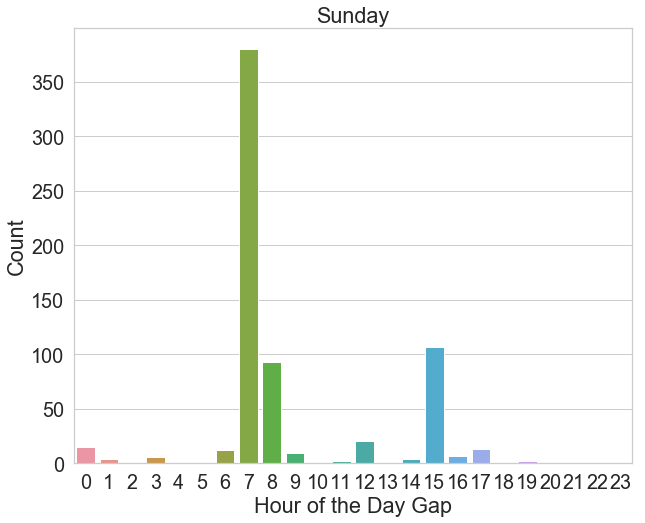

In [205]:
# Visualization
plt.figure(figsize=(10,8))
sns.countplot(gap['Hour'], order=np.arange(0,24));
plt.xlabel('Hour of the Day Gap')
plt.ylabel('Count');
plt.title('Sunday')
plt.show()

In [112]:
len(gap)

679

# Unique Subject line every time

In [115]:
gap['Subject'].value_counts().head(10)

Fwd: samples                                                                                      11
Logo Remixed. Redefined. Reinvented.                                                               2
b'Up to 70% off\xe2\x80\x94and layer on code ALLYOURS (hint: save on these winter essentials)'     1
With gratitude! 50% OFF EVERYTHING + shipping offer inside.                                        1
Jump-start your weekend with something new (bonus, too!)                                           1
Redeem code EVERYTHING now!                                                                        1
Vintage Soft Sweats. 10 colors. 4 styles. Talk about options                                       1
THIS. IS. IT. Up to 70% off + EXTRA 50% off                                                        1
(Code THANKS) We're giving you 40% off everything                                                  1
:) We're emailing you about code BRIGHT                                                    

In [148]:
gap['len_Sub']=gap['Subject'].apply(lambda x:len(x))
gap.head()

,Date_dt,Time,Day,Hour,Subject,Text,len_Sub
0,2018-12-26,07:52:14,Wedn,7,"b""IT'S OFFICIAL\xe2\x80\x94up to 75% off markd...",Up to 75% off markdowns + 40% off everything (...,77
1,2018-12-26,07:15:15,Wedn,7,Great Gap Sale (up to 75% off) starts NOW,\r\n\r\nGap Outlet\r\nhttp://click.email.gapf...,41
2,2018-12-25,17:19:06,Tues,17,It all starts TOMORROW! (Trust: you don't want...,Great Gap Sale starts 12/26.\r\nGAP\r\nhttps:/...,61
3,2018-12-21,07:57:25,Fri,7,"GIFTS SHIP UNTIL 3PM ET (plus, 51% OFF starts ...",Just in time: 51% OFF your purchase starts now...,51
4,2018-12-20,17:32:42,Thurs,17,SHOP QUICK! HOURS LEFT for FREE shipping on $1...,45% off every single thing.\r\nGAP\r\nhttps://...,58


Text(0,0.5,'# of Emails')

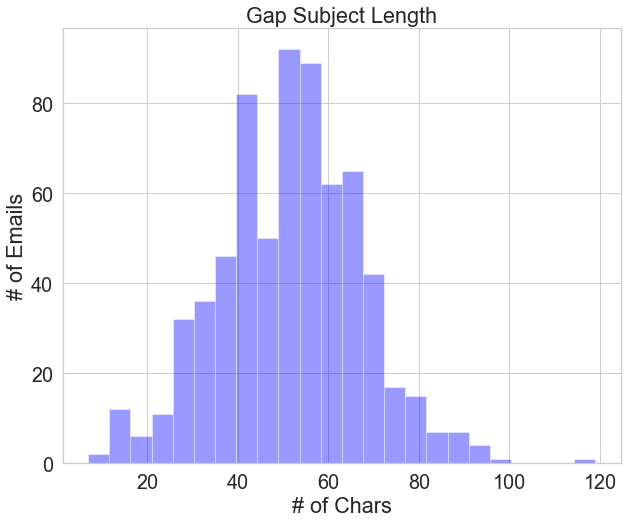

In [196]:
plt.figure(figsize=(10,8))
sns.distplot(gap['len_Sub'], color = 'blue',kde=False);
# Add labels
plt.title('Gap Subject Length')
plt.xlabel('# of Chars')
plt.ylabel('# of Emails')

In [116]:
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk
#nltk.download('English')
#nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize

In [137]:
# Tokenize and remove stop words in Subject
subject_str = gap['Subject'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in (stopwords.words('english'))]

# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,\',":;()|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

# Get most common words
clean=[word for word in clean if word not in ['ve','re','s','b']]
words = [item[0] for item in Counter(clean).most_common(19)]
counts = [item[1] for item in Counter(clean).most_common(19)]

# Subject:
popular words: '%','+','$','code','extra','everything','sale','bonus'

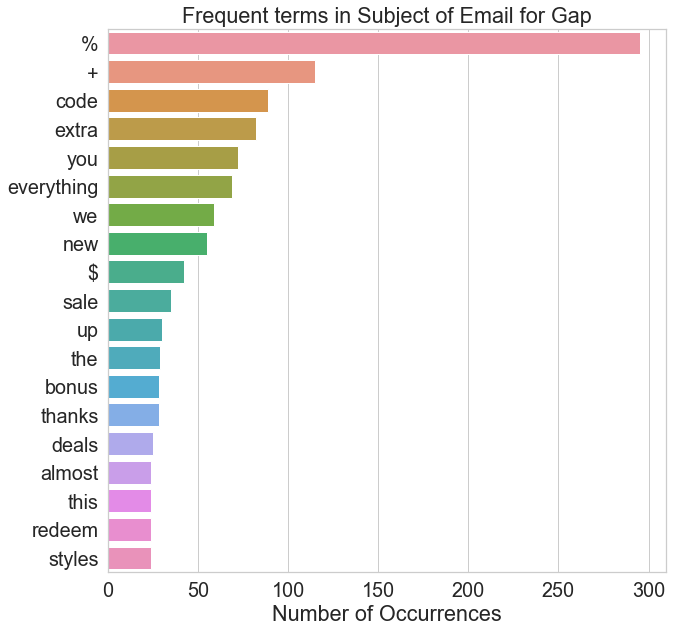

In [139]:
# Visualization
plt.figure(figsize=(10,10))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');
plt.title('Frequent terms in Subject of Email for Gap')
plt.show()

In [140]:
# Tokenize and remove stop words
subject_str = gap['Text'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

# Remove punctuation and numbers
punctuation = re.compile(r'[-.?!,":;()<>//``//]|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

# Get most common words
words = [item[0] for item in Counter(clean).most_common(19)]
counts = [item[1] for item in Counter(clean).most_common(19)]

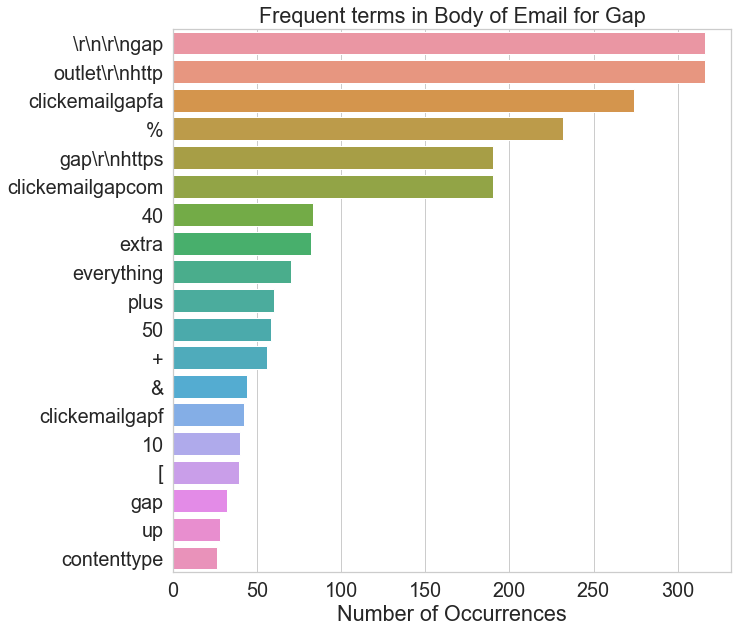

In [141]:
# Visualization
plt.figure(figsize=(10,10))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');
plt.title('Frequent terms in Body of Email for Gap')
plt.show()

# there is minimum Text content most of it is displayed in images

In [211]:
gap.iloc[450]['Text']

'GAP\r\nhttps://click.email.gap.com/?qs=940e8b5d6a4da31571ada0cc2cd2d54af8bd545dce98f8262da0f7ad2e4517df370095bc442b3bcbadcdba348c8c9f9e641e2e7f5e08b55c\r\n\r\n----------------------------------------------------------------------\r\n \r\nClick below to view this message from Gap in a web browser:\r\nhttps://view.email.gap.com/?qs=f0a4bf6a6279978ce873c61cf17ce8dfd5a196d499c473c432d38c13ec9fb2d3226fad1152e67a60c2f017336c9361b340cb7b7060d4326cc8942d9918f8c81b9843d8d098ceb6a8e605ee3cf0e3b85a\r\n \r\n----------------------------------------------------------------------\r\n\r\nPrivacy Policy:\r\nhttps://click.email.gap.com/?qs=940e8b5d6a4da3156b3d999835add9ab9a6c367d4a6944403ef6ac43cb182f89faa4a769806c93c00d413dc1a47a70d2beb9dd3adba36842\r\n \r\nUnsubscribe:\r\nhttps://click.email.gap.com/?qs=940e8b5d6a4da3156fa18940b051bb558ada2305f139105e17df2b0289e468b660fc825e2e61ec394a21dd954032b0d97b4f8ce2e69d1698\r\n\r\nCustomer Services, 100 Gap Online Drive, Grove City, OH 43123-8605.\r\n'